<a href="https://colab.research.google.com/github/ju-ki/pytorch_basic/blob/master/simple_dl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [3]:
digits_data = datasets.load_digits()

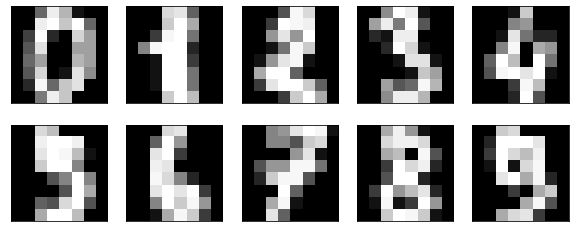

In [4]:
n_img = 10
plt.figure(figsize=(10, 4))
for i in range(n_img):
  ax = plt.subplot(2, 5, i+1)
  plt.imshow(digits_data.data[i].reshape(8, 8), cmap="Greys_r")
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

In [11]:
import torch 
from sklearn.model_selection import train_test_split

digit_images = digits_data.data
labels = digits_data.target
X_train, X_test, y_train, y_test = train_test_split(digit_images, labels)

X_train = torch.tensor(X_train, dtype=torch.float32)
t_train = torch.tensor(y_train, dtype=torch.int64) 
X_test = torch.tensor(X_test, dtype=torch.float32)
t_test = torch.tensor(y_test, dtype=torch.int64)

In [10]:
from torch import nn
net = nn.Sequential(
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 16),
    nn.ReLU(),
    nn.Linear(16, 10)
)

print(net)

Sequential(
  (0): Linear(in_features=64, out_features=32, bias=True)
  (1): ReLU()
  (2): Linear(in_features=32, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=10, bias=True)
)


In [13]:
from torch import optim
import tqdm

In [16]:
loss_fnc = nn.CrossEntropyLoss()

optimizer = optim.Adam(net.parameters(), lr=0.01)
record_loss_train = []
record_loss_test = []

for i in range(1000):
  optimizer.zero_grad()
  y_train = net(X_train)
  y_test = net(X_test)

  loss_train = loss_fnc(y_train, t_train)
  loss_test = loss_fnc(y_test, t_test)
  record_loss_train.append(loss_train.item())
  record_loss_test.append(loss_test.item())

  loss_train.backward()
  optimizer.step()

  if i %100 == 0:
    print("Epoch:", i, "Loss_train:", loss_train.item(), "Loss_test:", loss_test.item())


Epoch: 0 Loss_train: 2.1754791736602783 Loss_test: 2.184100866317749
Epoch: 100 Loss_train: 0.0029939671512693167 Loss_test: 0.14586541056632996
Epoch: 200 Loss_train: 0.0006881174631416798 Loss_test: 0.1609072983264923
Epoch: 300 Loss_train: 0.000313171767629683 Loss_test: 0.1687338799238205
Epoch: 400 Loss_train: 0.0001821512560127303 Loss_test: 0.17600898444652557
Epoch: 500 Loss_train: 0.00011990834900643677 Loss_test: 0.18104806542396545
Epoch: 600 Loss_train: 8.520028495695442e-05 Loss_test: 0.18554341793060303
Epoch: 700 Loss_train: 6.36802360531874e-05 Loss_test: 0.1894579976797104
Epoch: 800 Loss_train: 4.9472910177428275e-05 Loss_test: 0.19268298149108887
Epoch: 900 Loss_train: 3.9424787246389315e-05 Loss_test: 0.19591784477233887


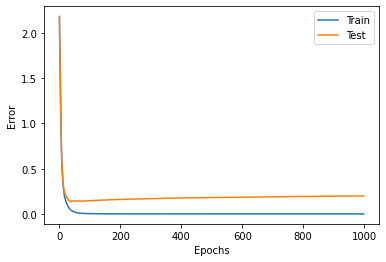

In [17]:

plt.plot(range(len(record_loss_train)), record_loss_train, label="Train")
plt.plot(range(len(record_loss_test)), record_loss_test, label="Test")
plt.legend()

plt.xlabel("Epochs")
plt.ylabel("Error")
plt.show()

In [19]:
y_test = net(X_test)
count = (y_test.argmax(1) == t_test).sum().item()
print("正解率:", str(count/len(y_test)*100) + "%")

正解率: 97.33333333333334%


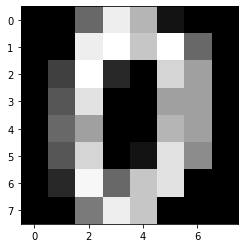

正解: 0 予測結果: 0


In [20]:
img_id = 0
x_pred = digit_images[img_id]
image = x_pred.reshape(8, 8)
plt.imshow(image, cmap="Greys_r")
plt.show()

x_pred = torch.tensor(x_pred, dtype=torch.float32)
y_pred = net(x_pred)
print("正解:", labels[img_id], "予測結果:", y_pred.argmax().item())